# ** CO2 Emission by Vehicles**

Data Set Details:
The file contains the data for this example. Here the number of variables (columns) is 12, and the number of instances (rows) is 7385. In that way, this problem has the 12 following variables:

1. make, car brand under study.

2. model, the specific model of the car.

3. vehicle_class, car body type of the car.

4. engine size, size of the car engine, in Liters.

5. cylinders, number of cylinders.

6. transmission, "A" for Automatic", "AM" for "Automated manual", "AS" for 'Automatic with select shift, "AV" for 'Continuously variable', "M" for 'Manual".

7. fuel type, "X" for 'Regular gasoline', "Z" for 'Premium gasoline', "D" for 'Diesel", "E" for 'Ethanol (E85)', "N" for 'Natural gas'.

8. fuel_consumption_city, City fuel consumption ratings, in liters per 100 kilometers.

9. fuel_consumption_hwy, Highway fuel consumption ratings, in liters per 100 kilometers. 10/ fuel_consumption_comb(l/100km), the combined fuel consumption rating (55% city, 45% highway), in L/100 km.

10. fuel_consumption_comb(mpg), the combined fuel consumption rating (55% city, 45% highway), in miles per gallon (mpg).

11. co2_emissions, the tailpipe emissions of carbon dioxide for combined city and highway driving, in grams per kilometer.




In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [88]:
from google.colab import files
upload=files.upload()

Saving co2_emissions (1).csv to co2_emissions (1) (2).csv


# **DATA READ**

In [89]:
df=pd.read_csv('co2_emissions (1).csv')

In [90]:
df.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244


In [91]:
df.shape

(7385, 12)

In [92]:
df.isnull().sum()

make                              0
model                             0
vehicle_class                     0
engine_size                       0
cylinders                         0
transmission                      0
fuel_type                         0
fuel_consumption_city             0
fuel_consumption_hwy              0
fuel_consumption_comb(l/100km)    0
fuel_consumption_comb(mpg)        0
co2_emissions                     0
dtype: int64

In [93]:
df[df.duplicated()].shape

(1112, 12)

In [94]:
df2=df.drop_duplicates()

In [95]:
df2.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244


In [96]:
df2.shape

(6273, 12)

In [97]:
df2.describe()

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
count,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000
mean,3.163000,5.620596,12.615591,9.073426,11.022111,27.395026,251.247250
std,1.365294,1.846424,3.550572,2.277893,2.945028,7.225472,59.235396
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.700000,10.300000,12.700000,32.000000,289.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [98]:
df_num=df2.drop(columns=['make'	,'model','vehicle_class', 'transmission','fuel_type']) #DROPPING CATEGORICAL COLUMN

In [99]:
c=df_num.corr() # CORRELAION
c

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
engine_size,1.000000,0.928796,0.834325,0.766700,0.820183,-0.764060,0.854999
cylinders,0.928796,1.000000,0.801180,0.717321,0.780932,-0.724347,0.834697
fuel_consumption_city,0.834325,0.801180,1.000000,0.950733,0.994040,-0.927901,0.918528
fuel_consumption_hwy,0.766700,0.717321,0.950733,1.000000,0.978578,-0.892238,0.883153
fuel_consumption_comb(l/100km),0.820183,0.780932,0.994040,0.978578,1.000000,-0.926110,0.916611
fuel_consumption_comb(mpg),-0.764060,-0.724347,-0.927901,-0.892238,-0.926110,1.000000,-0.906839
co2_emissions,0.854999,0.834697,0.918528,0.883153,0.916611,-0.906839,1.000000


# **EDA AND VISUALIZATION**

we have total number of 42 make value


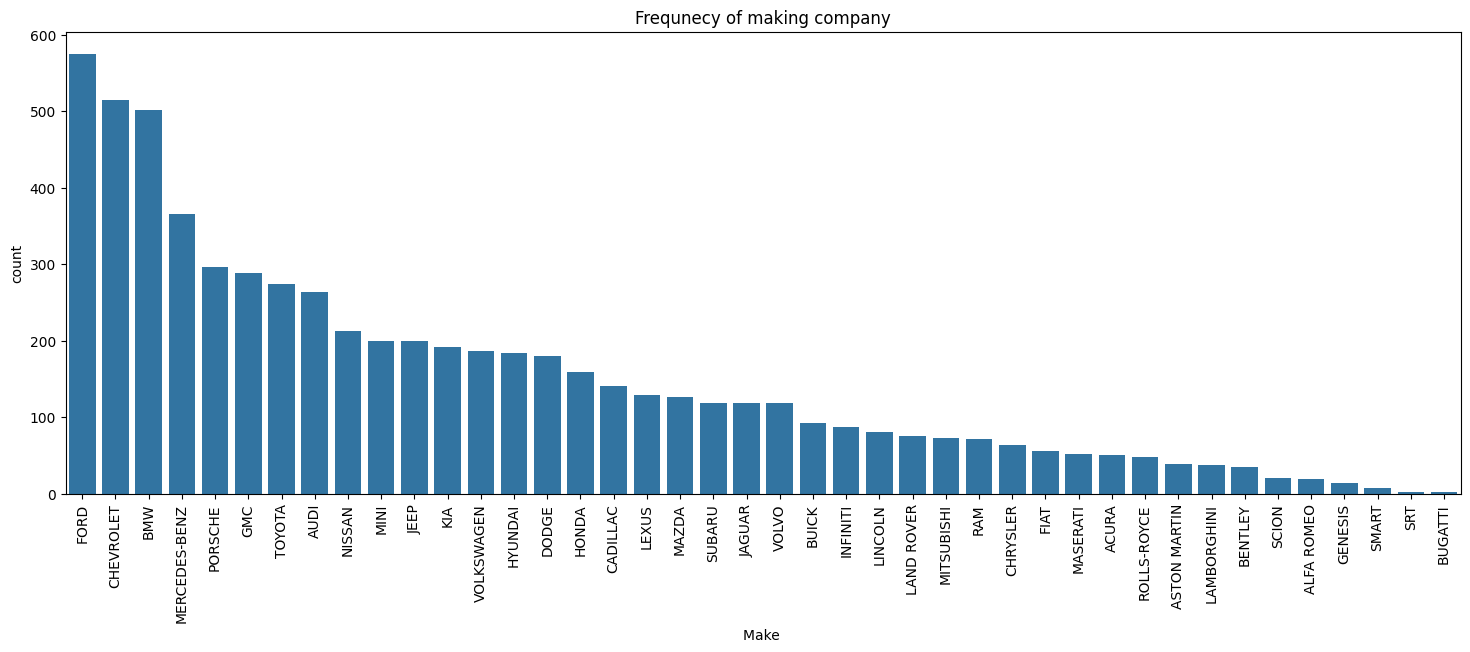

In [100]:
# 'MAKE' categorical column BAR PLOT

print('we have total number of',len(df2['make'].unique()),'make value')
df_make=df2['make'].value_counts().reset_index()
df_make.head()


plt.figure(figsize=(18,6))
fig1=sns.barplot(data=df_make,x='make',y='count')
plt.xticks(rotation=90)
plt.title('Frequnecy of making company')
plt.xlabel('Make ')
plt.ylabel('count')
plt.show()


we have no. of 2053 model


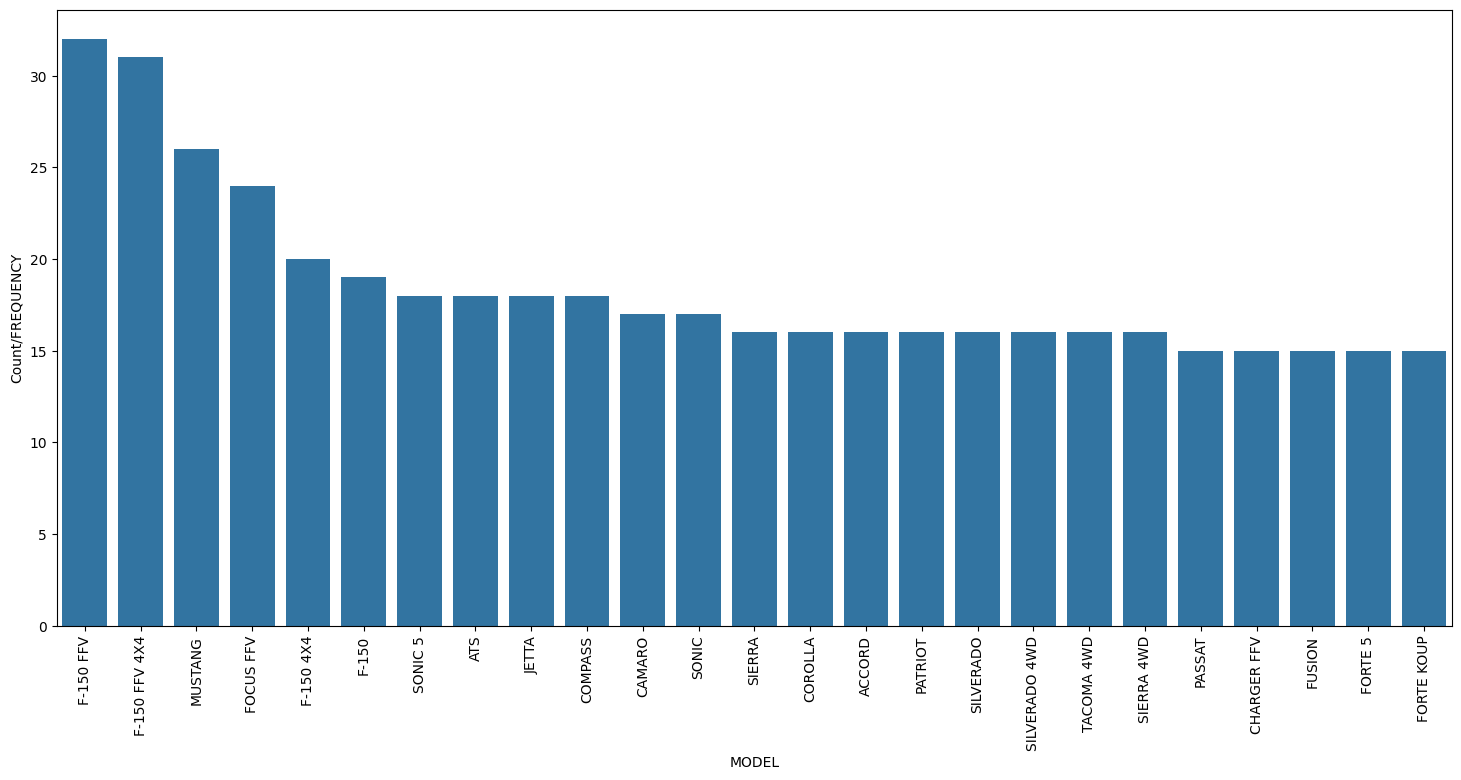

In [101]:
#"MODEL" categorical column bar plot
print('we have no. of',len(df2['model'].unique()),'model')
df_model=df2['model'].value_counts().reset_index().rename(columns={'count':'Count'})[:25]
df_model.head()

plt.figure(figsize=(18,8))
fig2=sns.barplot(data=df_model,x='model',y='Count')
plt.xticks(rotation=90)
plt.xlabel("MODEL")
plt.ylabel('Count/FREQUENCY')
plt.show()

we have total 16 number of vehicle


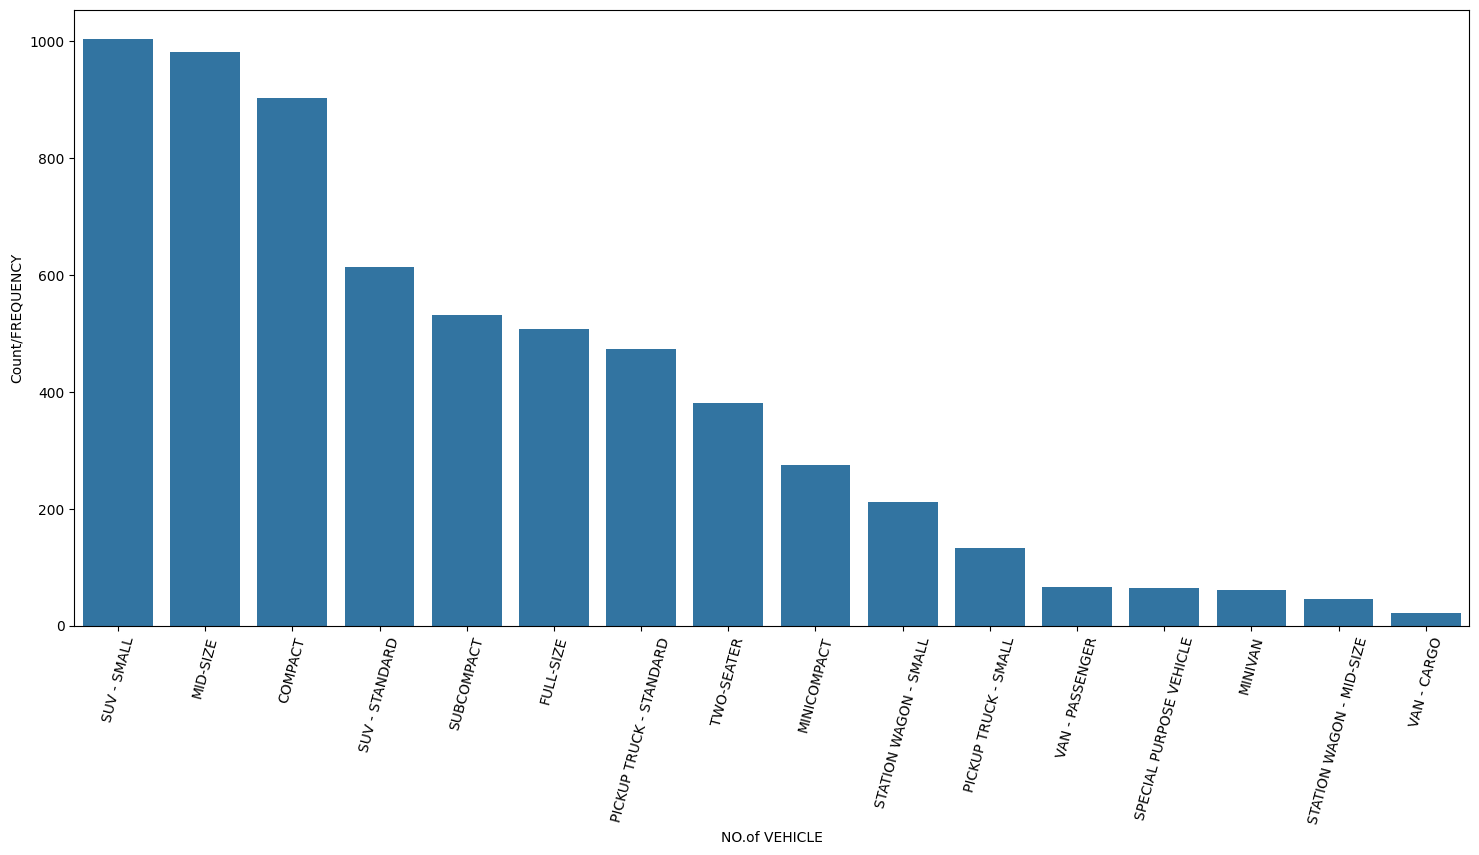

In [102]:
#VECHILE CATEGORICAL COLUMN BAR PLOT
print('we have total',len(df['vehicle_class'].unique()),'number of vehicle')
df_vehicle=df2['vehicle_class'].value_counts().reset_index()
df_vehicle.head()


plt.figure(figsize=(18,8))
fig3=sns.barplot(data=df_vehicle,x='vehicle_class',y='count')
plt.xticks(rotation=75)
plt.xlabel("NO.of VEHICLE")
plt.ylabel('Count/FREQUENCY')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

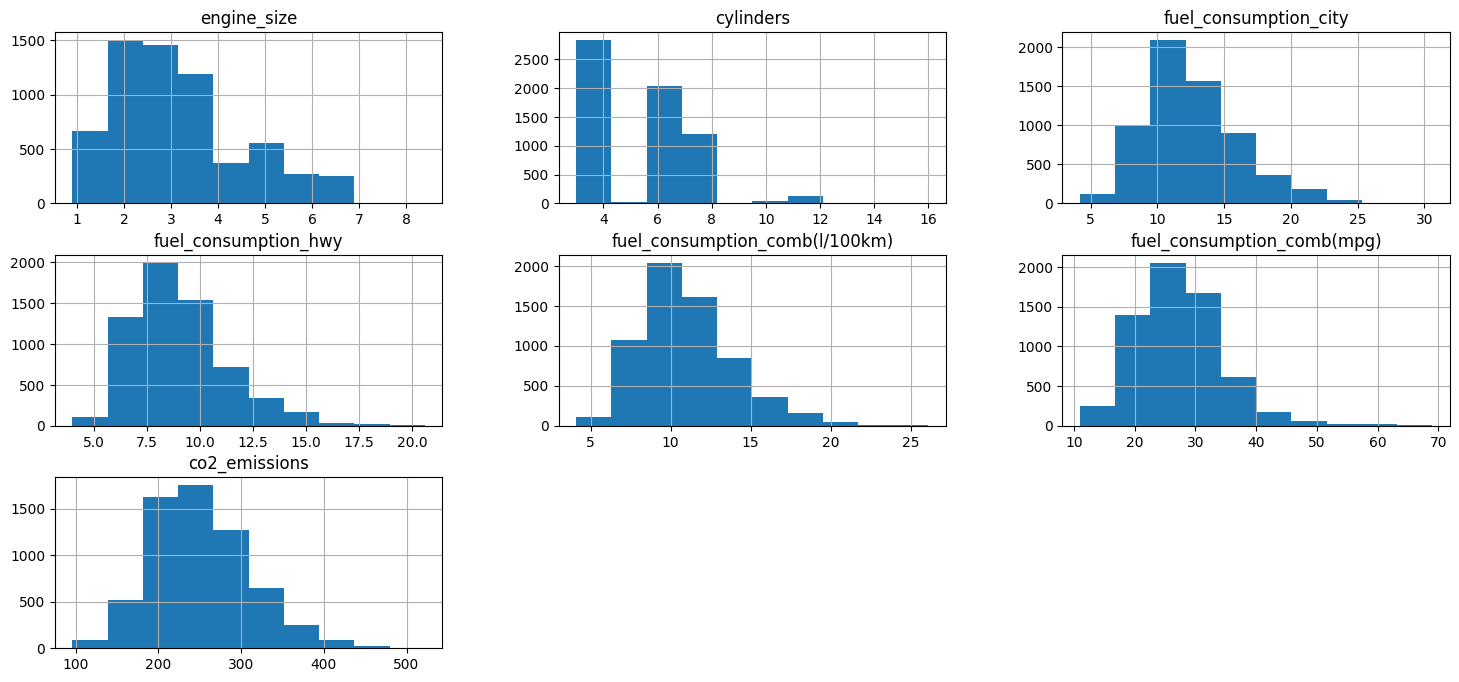

In [103]:
df_num.hist(figsize=(18,8)) #HISTOGRAM OF DATA
plt.show

<Axes: ylabel='transmission'>

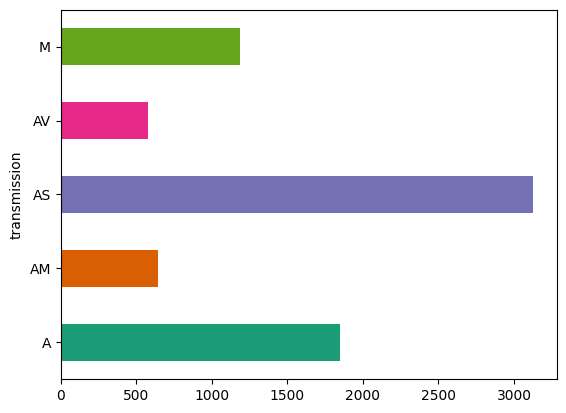

In [104]:
df.groupby('transmission').size().plot(kind='barh',color=sns.palettes.mpl_palette('Dark2')) #transmission column data

<Axes: ylabel='fuel_type'>

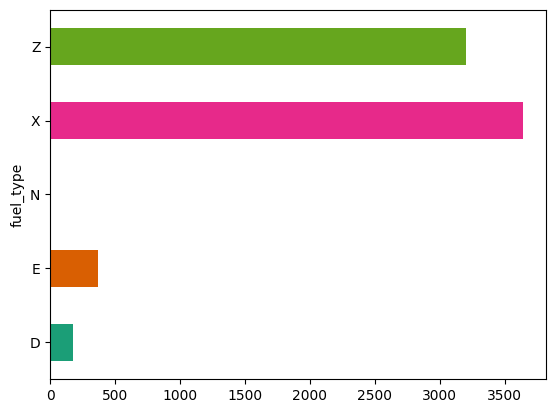

In [105]:
df.groupby('fuel_type').size().plot(kind='barh',color=sns.palettes.mpl_palette('Dark2')) #fuel type column data

<Axes: >

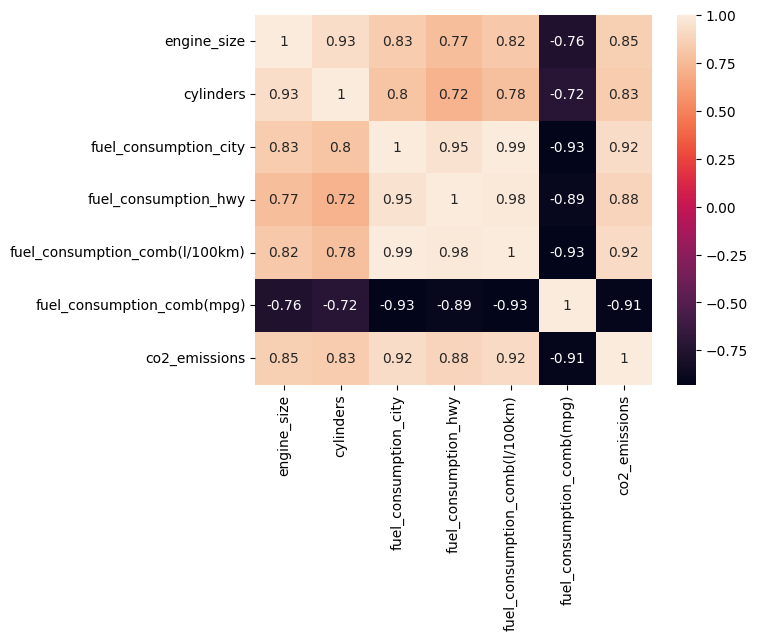

In [106]:
sns.heatmap(c,xticklabels=c.columns, yticklabels=c.columns,annot=True) #heatmap of correlated data

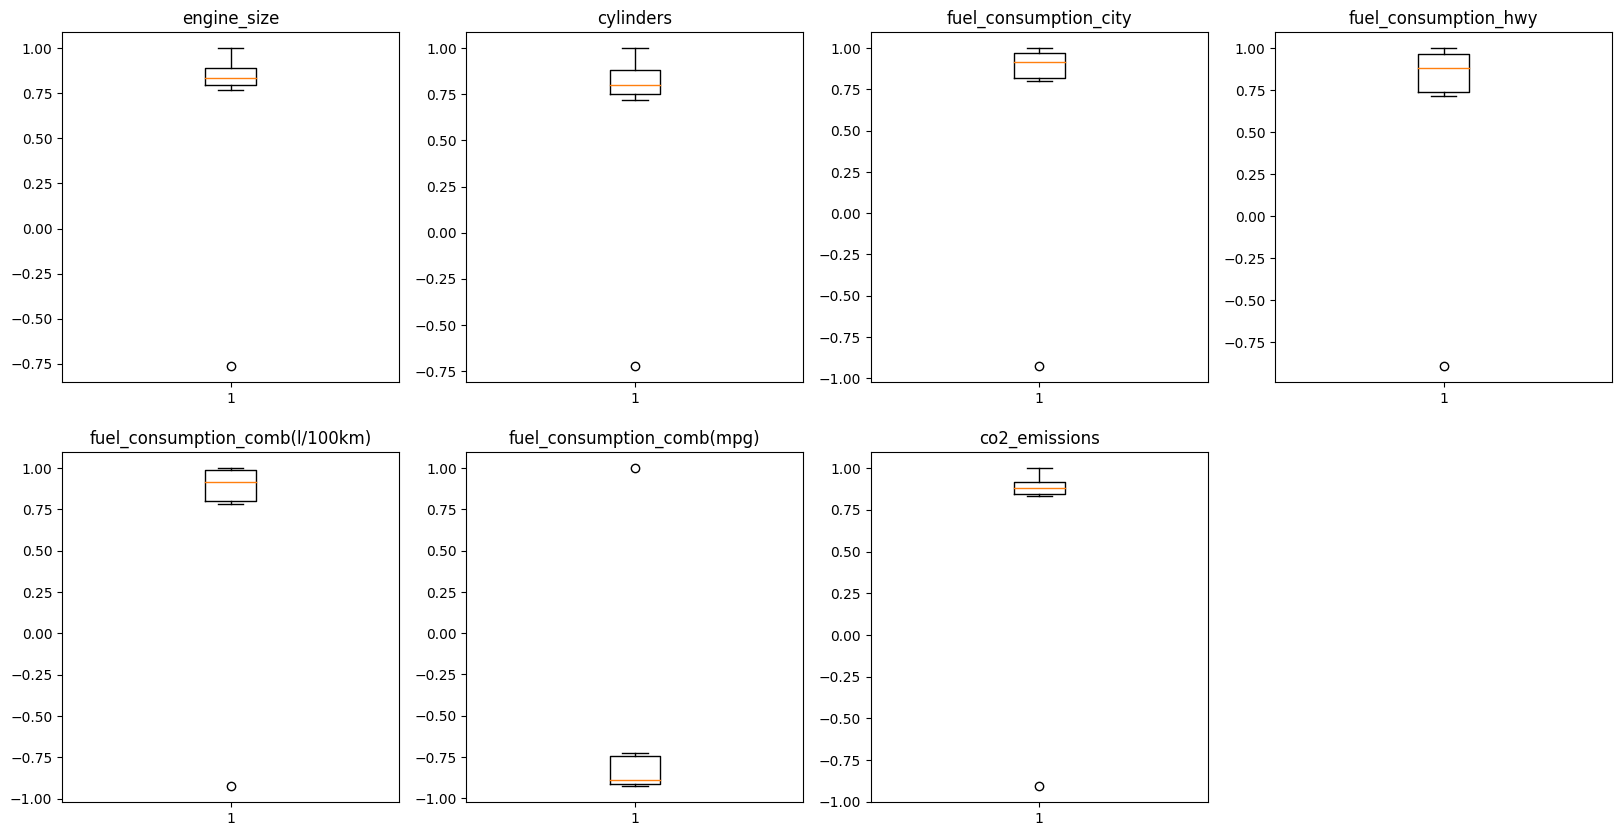

In [107]:
plt.figure(figsize = (20,10))
for i in enumerate(df_num):
    plt.subplot(2,4,i[0]+1)
    plt.title(i[1])
    plt.boxplot(c[i[1]])

In [108]:
from scipy import stats

In [110]:
z = np.abs(stats.zscore(df_num))

#removing the outliers
df_num = df_num[(z < 1.9).all(axis=1)]

df_num.reset_index(drop=True, inplace=True)

df_num.head()

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,3.5,6,12.7,9.1,11.1,25,255
3,3.5,6,12.1,8.7,10.6,27,244
4,3.5,6,11.9,7.7,10.0,28,230


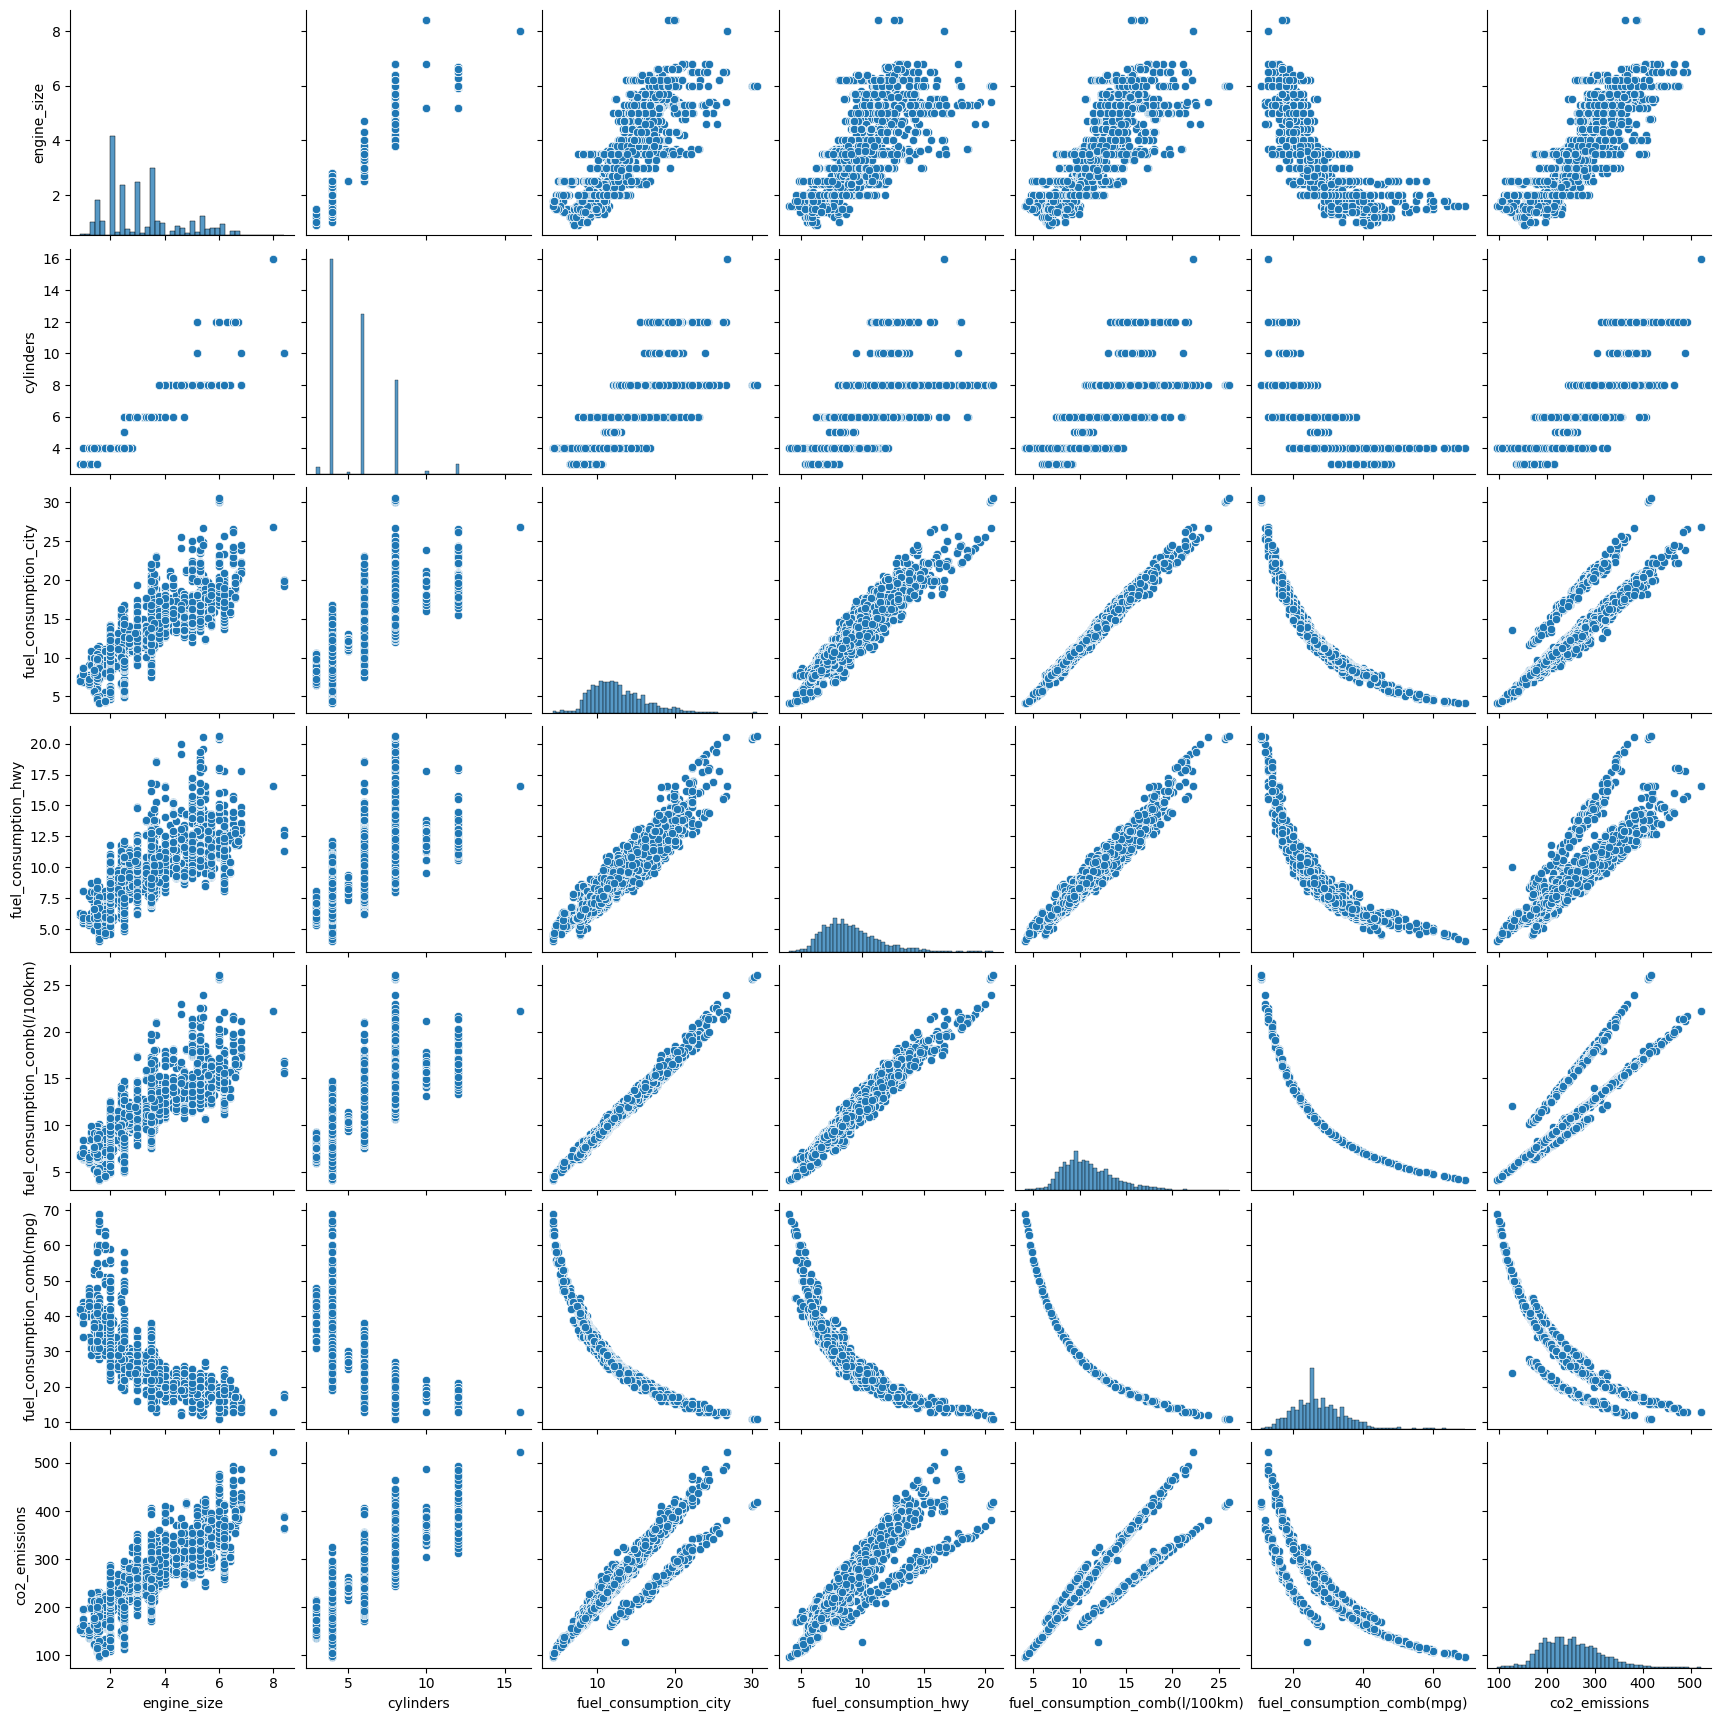

In [111]:
sns.pairplot(df2) #Pairplot of Whole data

In [112]:
df_num # all numerical column

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,3.5,6,12.7,9.1,11.1,25,255
3,3.5,6,12.1,8.7,10.6,27,244
4,3.5,6,11.9,7.7,10.0,28,230
...,...,...,...,...,...,...,...
5395,2.0,4,10.7,7.7,9.4,30,219
5396,2.0,4,11.2,8.3,9.9,29,232
5397,2.0,4,11.7,8.6,10.3,27,240
5398,2.0,4,11.2,8.3,9.9,29,232


# **VARIANCE INFLINATION FACTOR (Multicollinearity)**


In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [114]:
def calculate_vif(df_num):
  numerical_df = df_num.select_dtypes(include=['number'])
  X = sm.add_constant(numerical_df)
  vif_data=pd.DataFrame()
  vif_data['Feature']=numerical_df.columns
  vif_data["VIF"]=[variance_inflation_factor(X.values,i+1) for i in range(len(numerical_df.columns))]
  return vif_data
vif_scores=calculate_vif(df_num)
print(vif_scores)

                          Feature          VIF
0                     engine_size     9.531576
1                       cylinders     9.057267
2           fuel_consumption_city  1029.941044
3            fuel_consumption_hwy   296.444241
4  fuel_consumption_comb(l/100km)  2340.733829
5      fuel_consumption_comb(mpg)    23.359066
6                   co2_emissions    11.548577


# **FEATURE SELECTION**

In [115]:
correlation_target = c['co2_emissions'].abs()
high_correlation_features = correlation_target[correlation_target > 0.5].index.tolist()
print("High correlation features:", high_correlation_features)

High correlation features: ['engine_size', 'cylinders', 'fuel_consumption_city', 'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)', 'fuel_consumption_comb(mpg)', 'co2_emissions']


# **TRAIN TEST SPLIT**

In [116]:
from sklearn.model_selection import train_test_split,cross_val_score # Splitting data into two variable
# x=df_num.iloc[:,0:6] #INDEPENDENT VARIABLE
# y=df_num.iloc[:,:-1] #DEPENDENT VARIABLE
x = df[['fuel_consumption_city', 'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)','cylinders','engine_size','fuel_consumption_comb(mpg)']] #independent VAriable
y = df[['co2_emissions']] # dependent Variable

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

 *STANDARD SCALER*



In [117]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_std=sc.fit_transform(x_train)
x_train

,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),cylinders,engine_size,fuel_consumption_comb(mpg)
6590,11.4,8.1,9.9,6,3.0,29
6274,14.7,10.3,12.7,6,4.0,22
2251,13.8,9.0,11.7,6,3.0,24
3149,11.3,7.9,9.8,6,3.4,29
4362,10.1,7.0,8.7,4,2.0,32
...,...,...,...,...,...,...
5191,10.3,7.4,9.0,4,2.0,31
5226,10.6,7.3,9.1,6,3.5,31
5390,11.7,8.8,10.4,6,3.5,27
860,9.5,7.4,8.6,4,2.5,33


# **MODEL BUILDING**

# **LINEAR REGRESSION**

In [118]:
from sklearn.linear_model import LinearRegression

In [119]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [120]:
from sklearn.metrics import mean_squared_error, r2_score

In [121]:
model.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 337.46089969743235
Root Mean Squared Error: 18.370108864604813
R-squared: 0.9018902750130587


# **RANDOM FOREST**

In [122]:
from sklearn.ensemble import RandomForestRegressor

In [123]:
regressor=RandomForestRegressor(n_estimators=10,random_state=0,oob_score=True)
regressor.fit(x,y)

RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

# **FEATURE SELECTION IN RANDOM FOREST**

In [124]:
feature_importances = pd.Series(regressor.feature_importances_, index=x_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

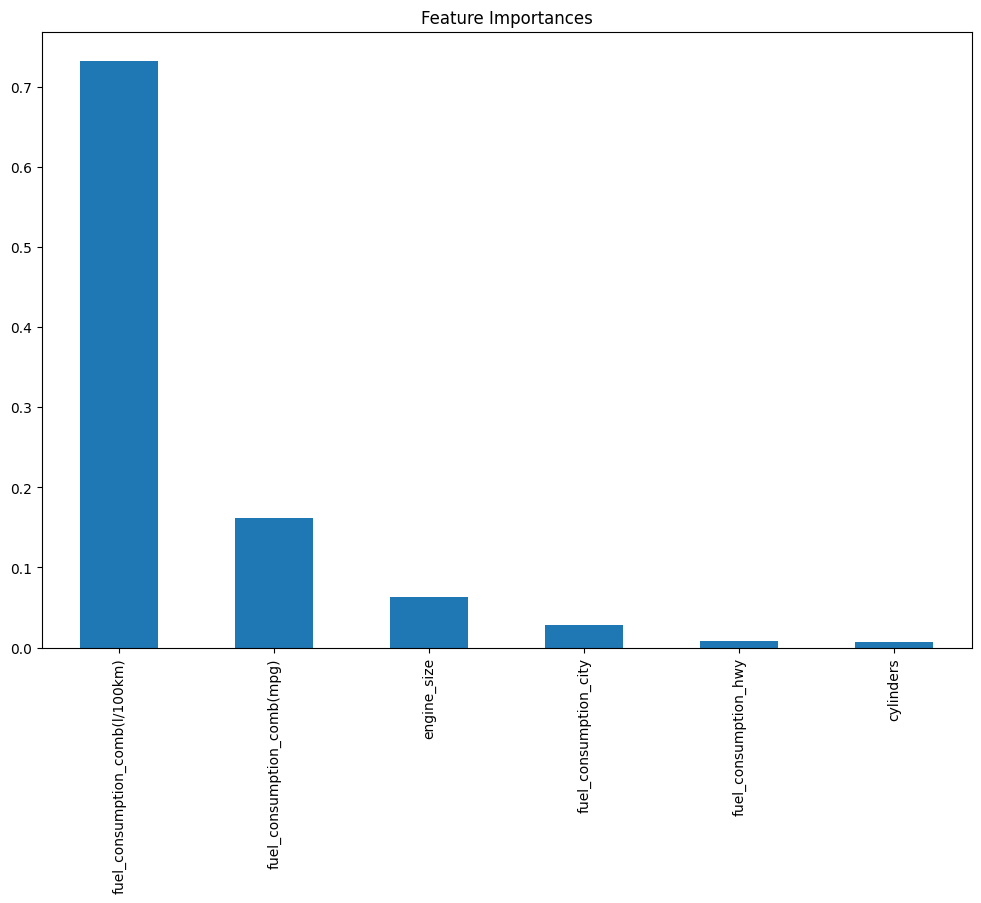

Top features based on feature importance: ['fuel_consumption_comb(l/100km)', 'fuel_consumption_comb(mpg)', 'engine_size', 'fuel_consumption_city', 'fuel_consumption_hwy']


In [125]:
plt.figure(figsize=(12, 8))
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.show()

# Select top features based on feature importance
top_features = feature_importances.head(5).index.tolist()
print("Top features based on feature importance:", top_features)

In [126]:
from sklearn.metrics import mean_squared_error,r2_score
oob_score=regressor.oob_score_
print(f'oob score :{oob_score}')
predictions=regressor.predict(x)
mse=mean_squared_error(y,predictions)
print(f'mean squares error : {mse}')
r2=r2_score(y,predictions)
print(f'R-Squared:{r2}')

oob score :0.7957546529837694
mean squares error : 11.022081837472804
R-Squared:0.9967802476294475


# **SUPPORT VECTOR MACHINE**

In [127]:
scaler =StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)



In [128]:
from sklearn.svm import SVR

In [129]:
svm_model=SVR(kernel='rbf',C=1.0,epsilon=0.1)
svm_model=model.fit(x_train,y_train)

In [135]:
y_pred_train=svm_model.predict(x_train)
y_pred_test=svm_model.predict(x_test)

In [136]:
train_mse=mean_squared_error(y_train,y_pred_train)
test_mse=mean_squared_error(y_test,y_pred_test)
train_r2=r2_score(y_train,y_pred_train)
test_r2=r2_score(y_test,y_pred_test)


In [137]:
print(f'Train_mse:{train_mse}')
print(f'Test_mse:{test_mse}')
print(f'Train_r2_score:{train_r2}')
print(f'Test_r2_score:{test_r2}')

Train_mse:400.42085666744373
Test_mse:394.0814888452334
Train_r2_score:0.8828682519892848
Test_r2_score:0.8854290185093571


## ***ALL MODELS ***

In [138]:
# Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_train_pred_lr = lr_model.predict(x_train)
y_test_pred_lr = lr_model.predict(x_test)
train_r2_lr = r2_score(y_train, y_train_pred_lr)
test_r2_lr = r2_score(y_test, y_test_pred_lr)
cv_train_r2_lr = cross_val_score(lr_model, x_train, y_train, cv=5, scoring='r2').mean()
cv_test_r2_lr = cross_val_score(lr_model, x_test, y_test, cv=5, scoring='r2').mean()

# Model 2: Random Forest
rf_model = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
rf_model.fit(x_train, y_train)
y_train_pred_rf = rf_model.predict(x_train)
y_test_pred_rf = rf_model.predict(x_test)
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)
cv_train_r2_rf = cross_val_score(rf_model, x_train, y_train, cv=5, scoring='r2').mean()
cv_test_r2_rf = cross_val_score(rf_model, x_test, y_test, cv=5, scoring='r2').mean()

# Model 3: SVM
svm_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svm_model.fit(x_train, y_train)
y_train_pred_svm = svm_model.predict(x_train)
y_test_pred_svm = svm_model.predict(x_test)
train_r2_svm = r2_score(y_train, y_train_pred_svm)
test_r2_svm = r2_score(y_test, y_test_pred_svm)
cv_train_r2_svm = cross_val_score(svm_model, x_train, y_train, cv=5, scoring='r2').mean()
cv_test_r2_svm = cross_val_score(svm_model, x_test, y_test, cv=5, scoring='r2').mean()

# Create a DataFrame to store the R² scores
r2_scores = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'SVM'],
    'R^2 score on Training Data': [train_r2_lr, train_r2_rf, train_r2_svm],
    'R^2 score on Testing Data': [test_r2_lr, test_r2_rf, test_r2_svm],
    'Cross-validated Training R^2 score': [cv_train_r2_lr, cv_train_r2_rf, cv_train_r2_svm],
    'Cross-validated Testing R^2 score': [cv_test_r2_lr, cv_test_r2_rf, cv_test_r2_svm]
})

print(r2_scores)

               Model  R^2 score on Training Data  R^2 score on Testing Data  \
0  Linear Regression                    0.904384                   0.901054   
1      Random Forest                    0.996165                   0.914392   
2                SVM                    0.882868                   0.885429   

   Cross-validated Training R^2 score  Cross-validated Testing R^2 score  
0                            0.903668                           0.898397  
1                            0.979567                           0.954128  
2                            0.873336                           0.787200  


In [139]:
r2_scores

,Model,R^2 score on Training Data,R^2 score on Testing Data,Cross-validated Training R^2 score,Cross-validated Testing R^2 score
0,Linear Regression,0.904384,0.901054,0.903668,0.898397
1,Random Forest,0.996165,0.914392,0.979567,0.954128
2,SVM,0.882868,0.885429,0.873336,0.787200


<Figure size 1200x600 with 0 Axes>

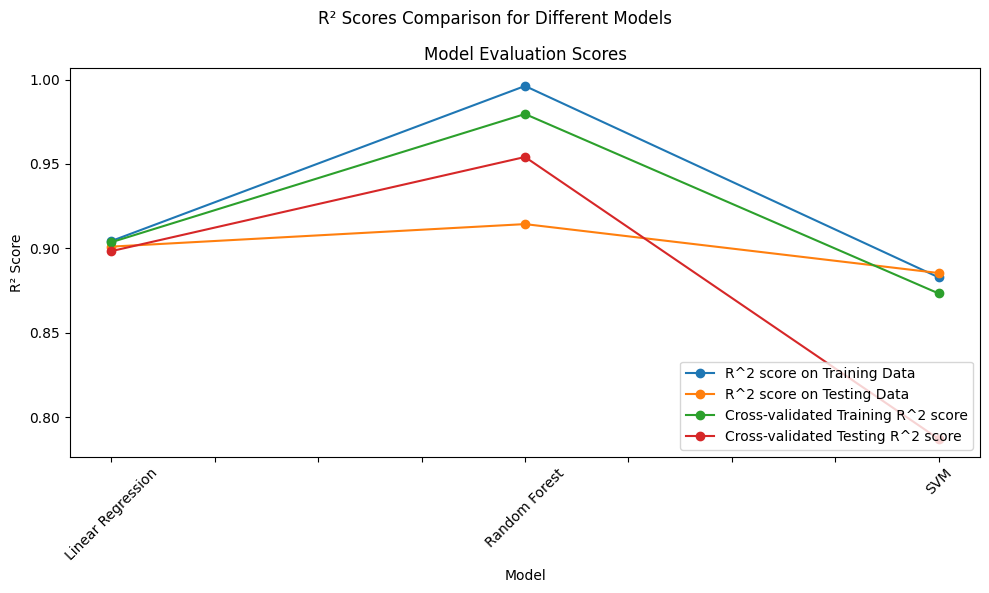

In [140]:
plt.figure(figsize=(12, 6))

# Plotting line chart for scores
r2_scores.plot(x='Model', y=['R^2 score on Training Data', 'R^2 score on Testing Data', 'Cross-validated Training R^2 score', 'Cross-validated Testing R^2 score'], kind='line', marker='o', figsize=(10, 6))
plt.suptitle('R² Scores Comparison for Different Models')
plt.title('Model Evaluation Scores')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()